In [1]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import torch
import torch.nn.functional as F
import torchvision
from torch import nn
from tqdm.notebook import tqdm
import glob
import sys

matplotlib.rcParams['figure.figsize'] = (12, 8)

## 1. PyTorch

In [ ]:
numpy_x = np.random.rand(10, 10)
torch_x = torch.tensor(numpy_x)

In [ ]:
np.allclose(numpy_x.ravel(), torch_x.flatten())

True

In [ ]:
x = torch.randn(10, 2, 5)
y = torch.randn(10, 2, 5)

In [ ]:
x + y

tensor([[[ 0.9754,  0.5742, -0.9201, -1.2494, -0.6695],
         [-1.7887, -1.7124, -0.2259, -2.2589,  1.3253]],

        [[-0.1653,  0.2616, -0.0441, -0.4639, -0.1408],
         [-0.4352, -1.6940, -0.1281,  0.2375,  0.2490]],

        [[ 0.4897,  0.4927, -0.7405, -0.3426, -1.3335],
         [-0.5576,  3.0408, -0.1372,  0.6901, -0.1527]],

        [[ 0.7392,  1.3041,  2.5520, -1.8105,  1.6778],
         [ 1.2126, -0.9650, -0.0222,  1.8452, -0.9387]],

        [[-0.3795,  2.3319, -0.4369, -1.2635,  0.1688],
         [-1.8705,  0.4886, -0.0838,  2.0766,  1.4475]],

        [[ 1.2418, -0.4265,  2.3223, -1.7725, -0.2144],
         [ 0.9379, -0.2602,  1.1009, -2.1437, -1.9526]],

        [[-1.1226,  2.1588,  0.5904, -0.2883, -1.9230],
         [ 1.6507, -1.5530,  0.2144, -0.1529,  0.3589]],

        [[ 0.2665,  1.0034, -0.1862, -0.5027, -1.3610],
         [ 0.2856, -0.4799,  1.4852, -2.4665, -0.4706]],

        [[ 1.7669,  1.1166, -1.3981,  2.0151, -2.0142],
         [ 2.4435,  1.7107, -0.5

In [ ]:
x * y

tensor([[[ 1.7877e-02, -1.4955e-01, -7.8037e-01, -1.1362e+00,  8.8967e-02],
         [ 7.5181e-01,  6.0836e-01,  1.1486e-02,  9.7914e-01, -1.0355e+00]],

        [[-7.6309e-03, -1.4488e+00, -7.8376e-01, -3.2223e-01, -8.8775e-02],
         [-2.3111e-01, -1.6426e+00, -2.2479e-01, -3.3190e-01, -1.6667e-01]],

        [[-2.2891e-03, -1.2017e+00,  1.0760e-01,  1.3853e-02,  4.3722e-01],
         [ 5.0563e-02,  2.2580e+00, -7.1717e-02,  1.0509e-01, -5.3207e-01]],

        [[ 1.3471e-01,  3.0980e-01,  1.5999e+00,  1.2664e-01, -3.1504e+00],
         [ 3.4778e-01,  1.1615e-01, -8.9241e-01,  7.4438e-01, -5.4775e-01]],

        [[-2.9009e-01,  1.2507e+00,  4.8859e-03, -2.2927e+00, -1.4092e+00],
         [ 8.6448e-01,  5.9430e-02, -2.0297e-03, -6.0802e-01, -2.5172e-01]],

        [[ 3.8129e-01, -1.4696e+00,  1.0302e+00, -3.2022e+00, -8.2765e-02],
         [ 1.3747e-01, -4.1657e-02, -4.2713e-01,  7.1070e-01,  3.1678e-01]],

        [[-1.2874e+00,  4.7544e-01, -6.4201e-01, -1.8864e+00,  7.3039e-01],


In [ ]:
x.flatten().size()

torch.Size([100])

A small example of how operations change:

x.reshape([1,2,8]) -> x.view(1,2,8)

x.sum(axis=-1) -> x.sum(dim=-1)

x.astype("int64") -> x.type(torch.LongTensor)

In Pytorch, when creating a tensor, it is possible to specify whether a gradient should be calculated on it or not, using the `requires_grad` parameter. When `requires_grad=True` we tell the framework that we want to keep track of all the tensors that come from the generated one. In other words, any tensor with this parameter specified will have access to a chain of operations and transformations performed on them. If these functions are differentiable, then the tensor has a `.grad` parameter, which stores the value of the gradient.

In [ ]:
w = torch.tensor(np.random.randn(10, 10), requires_grad=True, device="cpu", dtype=torch.float32)
x = torch.rand(10, dtype=torch.float32)
b = torch.tensor(np.random.randn(10), requires_grad=True, device="cpu", dtype=torch.float32)

In [ ]:
y = w @ x + b

In [ ]:
y.requires_grad

True

In [ ]:
y.detach().requires_grad

False

## 1.1 My first neural network in PyTorch


In [ ]:
device = "cuda:0" if torch.cuda.is_available() else "cpu"
print(device)

cuda:0


In [ ]:
!nvidia-smi

Sat Mar 30 21:40:47 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   45C    P8               9W /  70W |      3MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In order to figure out how to train a neural network in Pytorch, you need to know three things:

1. How to creat batches and send them into neural network
2. How to create a neural network
3. How to write a learning loop and track metrics

#### How to generate batches and feed them to the input of a neural network

In order to be able to iterate over data in this framework and apply transformations to them, for example, augmentations, which you will learn about later, you need to create your own class inherited from `torch.utils.data.Dataset`.

Here's an example from the documentation:

```
class FaceLandmarksDataset(torch.utils.data.Dataset):
    """Face Landmarks dataset."""

    def __init__(self, csv_file, root_dir, transform=None):
        """
        Args:
            csv_file (string): Path to the csv file with annotations.
            root_dir (string): Directory with all the images.
            transform (callable, optional): Optional transform to be applied
                on a sample.
        """
        self.landmarks_frame = pd.read_csv(csv_file)
        self.root_dir = root_dir
        self.transform = transform

    def __len__(self):
        return len(self.landmarks_frame)

    def __getitem__(self, idx):
        if torch.is_tensor(idx):
            idx = idx.tolist()

        img_name = os.path.join(self.root_dir,
                                self.landmarks_frame.iloc[idx, 0])
        image = io.imread(img_name)
        landmarks = self.landmarks_frame.iloc[idx, 1:]
        landmarks = np.array([landmarks])
        landmarks = landmarks.astype('float').reshape(-1, 2)
        sample = {'image': image, 'landmarks': landmarks}

        if self.transform:
            sample = self.transform(sample)

        return sample
```

As you can see, such a class **must** have two methods:

* `__len__` -- returns information about how many objects we have in the dataset
* `__getitem__` -- returns the sample and its target


Now let's write one ourselves, as a dataset we will generate random data.

In [2]:
class RandomDataset(torch.utils.data.Dataset):
    """
    Our random dataset
    """
    def __init__(self, x, y):
        self.x = x
        self.y = y

    def __len__(self):
        return len(self.x)

    def __getitem__(self, idx):
        return {"sample": torch.tensor(x[idx, :], dtype=torch.float), "target": y[idx]}

In [ ]:
x = np.random.rand(1000, 5)
y = np.random.rand(1000)

In [ ]:
our_dataset = RandomDataset(x, y)

In [ ]:
our_dataset[1]

{'sample': tensor([0.5756, 0.8724, 0.0421, 0.9354, 0.6719]),
 'target': 0.6623266446360176}

In order to get batches from data in pytorch, such an entity as a dataloader is used, which takes as input a class inherited from `torch.utils.data.Dataset`. Now let's look at an example:

In [ ]:
dataloader = torch.utils.data.DataLoader(our_dataset, batch_size=4)

In [ ]:
batch = next(iter(dataloader))

print(f"Sample:\n{batch['sample']}")
print(f"Target:\n{batch['target']}")

Sample:
tensor([[0.2425, 0.2200, 0.1886, 0.4203, 0.4485],
        [0.5756, 0.8724, 0.0421, 0.9354, 0.6719],
        [0.9368, 0.6212, 0.0401, 0.8479, 0.5784],
        [0.5058, 0.4666, 0.1013, 0.4244, 0.2107]])
Target:
tensor([0.1721, 0.6623, 0.2333, 0.2897], dtype=torch.float64)


In [3]:
mnist_train = torchvision.datasets.MNIST(
    "./mnist/",
    train=True,
    download=True,
    transform=torchvision.transforms.ToTensor()
)
mnist_val = torchvision.datasets.MNIST(
    "./mnist/",
    train=False,
    download=True,
    transform=torchvision.transforms.ToTensor()
)

train_dataloader = torch.utils.data.DataLoader(
    mnist_train,
    batch_size=4,
    shuffle=True,
    num_workers=1
)

val_dataloader = torch.utils.data.DataLoader(
    mnist_val,
    batch_size=4,
    shuffle=False,
    num_workers=1
)

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:06<00:00, 1450745.05it/s]


Extracting ./mnist/MNIST\raw\train-images-idx3-ubyte.gz to ./mnist/MNIST\raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 235348.84it/s]


Extracting ./mnist/MNIST\raw\train-labels-idx1-ubyte.gz to ./mnist/MNIST\raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:02<00:00, 586793.21it/s]


Extracting ./mnist/MNIST\raw\t10k-images-idx3-ubyte.gz to ./mnist/MNIST\raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 2273875.48it/s]

Extracting ./mnist/MNIST\raw\t10k-labels-idx1-ubyte.gz to ./mnist/MNIST\raw



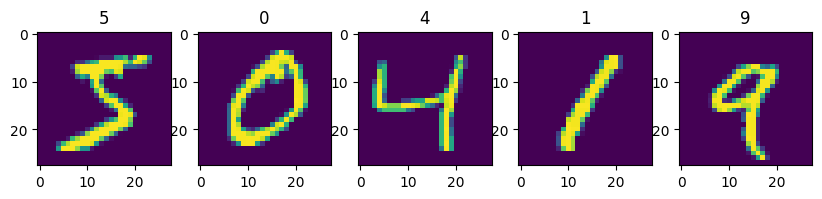

In [4]:
n_images_to_show = 5
plt.figure(figsize=(10, 15))
for i in range(n_images_to_show):
    plt.subplot(1, n_images_to_show, i + 1)
    plt.imshow(mnist_train[i][0].squeeze())
    plt.title(str(mnist_train[i][1]))
plt.show()


In order to create neural networks in high-level pytorch, the `nn` module is used. The neural network must be inherited from the `nn.Module` class. An example of how it might look:

```
class Model(nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.conv1 = nn.Conv2d(1, 20, 5)
        self.conv2 = nn.Conv2d(20, 20, 5)

    def forward(self, x):
       x = F.relu(self.conv1(x))
       return F.relu(self.conv2(x))
```


As we can see in this example, this class **must** have a `forward` method, which defines the forward passage of the neural network. You can also see from the class above that the `nn` module contains the implementation of most layers, and the `nn.functional` module contains the activation functions.

There is another way to create a neural network, and let's take a look at it in practice:

In [5]:
import torch.nn as nn

In [6]:
model = nn.Sequential(
    nn.Flatten(),             # turn a 28x28 image into a 784 vector
    nn.Linear(28 * 28, 128),  # linear layer converting a vector of size 784 to a vector of size 128
    nn.ReLU(),                # nonlinearity
    nn.Linear(128, 10),       # linear layer converting a vector of size 128 to a vector of size 10
)

# create an optimizer that will update the weights of the model
optimizer = torch.optim.SGD(model.parameters(), lr=0.05)

In [8]:
import wandb

wandb.login()
wandb.init(project="SoQ_Section4_Intro_to_DL")
wandb.watch(model);

Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:


Abort: 

In [13]:
def predict_and_calculate_metrics(model, x, y, device):
    x = x.to(device) # move x to cuda or cpu
    y = y.to(device) # move y to cuda or cpu
    y_pred = model(x) # make predictions
    loss = F.cross_entropy(y_pred, y) # calculate loss
    accuracy = (torch.argmax(y_pred, dim=-1) == y).detach().cpu().numpy().tolist() # calculate accuracy
    return loss, accuracy

def train_classifier(model, optimizer, n_epochs, device,
                     train_dataloader, val_dataloader, scheduler=None):
    model.to(device)
    for epoch in range(n_epochs): # epoch = full pass through the entire dataset
        train_loss = []
        train_accuracy = []
        model.train()
        for x_train, y_train in train_dataloader: # iterate over batches
            loss, accuracy = predict_and_calculate_metrics(model, x_train, y_train, device)
            optimizer.zero_grad() # reset the gradients
            loss.backward() # calculate the gradients in a backward pass
            optimizer.step() # update network parameters
            train_loss.append(loss.item())
            train_accuracy.extend(accuracy)
        # wandb.log({"train_loss": np.mean(train_loss),
        #            "train_accuracy": np.mean(train_accuracy)})

        val_loss = []
        val_accuracy = []
        model.eval() # = model.train(False)
        with torch.no_grad():
            for x_val, y_val in tqdm(val_dataloader):
                loss, accuracy = predict_and_calculate_metrics(model, x_val,
                                                               y_val, device)
                val_loss.append(loss.item())
                val_accuracy.extend(accuracy)
        if scheduler is not None:
            scheduler.step(np.mean(val_loss))

        # log metrics in wandb and automatically look at the plots
        # wandb.log({"val_loss": np.mean(val_loss), "val_accuracy": np.mean(val_accuracy)})

        # print metrics
        print(f"Epoch: {epoch}, val_loss: {np.mean(val_loss)}, val_accuracy: {np.mean(val_accuracy)}")

In [14]:
train_classifier(model, optimizer, 20, "cuda:0", train_dataloader, val_dataloader)

ImportError: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html

## 2. Convolutional Neural Networks

Files already downloaded and verified


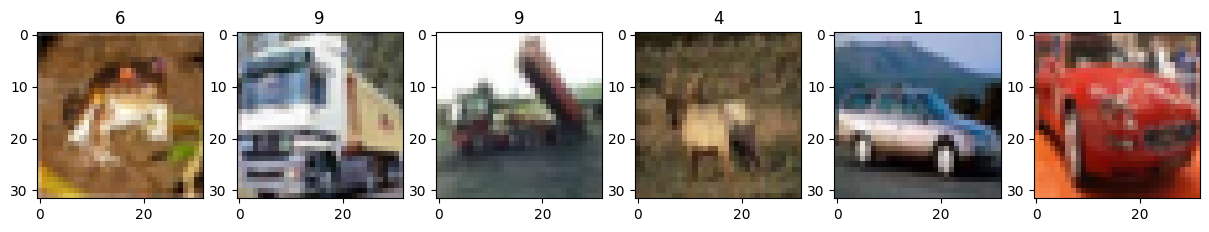

In [ ]:
import torchvision.transforms as transforms

train_set = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transforms.ToTensor())
plt.figure(figsize=(15, 20))

for i in range(6):
    plt.subplot(1, 6, i + 1)
    plt.imshow(transforms.ToPILImage()(train_set[i][0]))
    plt.title(str(train_set[i][1]))
plt.show()

Files already downloaded and verified


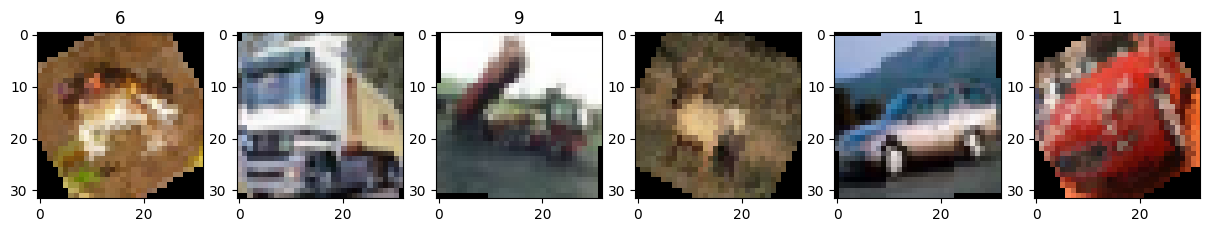

In [ ]:
augmentations = [transforms.RandomRotation(degrees=30),
                 transforms.RandomHorizontalFlip(),
                 ]

train_set = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transforms.Compose([*augmentations, transforms.ToTensor()]))
plt.figure(figsize=(15, 20))
for i in range(6):
    plt.subplot(1, 6, i + 1)
    plt.imshow(transforms.ToPILImage()(train_set[i][0]))
    plt.title(str(train_set[i][1]))
plt.show()

In [ ]:
basic_transform = [transforms.ToTensor(),
                   transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))]

batch_size = 32

train_set = torchvision.datasets.CIFAR10(root='./data',
                                         train=True,
                                         download=True, transform=transforms.Compose(
                                            [*augmentations, *basic_transform])
                                        )
train_loader = torch.utils.data.DataLoader(train_set, batch_size=batch_size,
                                          shuffle=True)

val_set = torchvision.datasets.CIFAR10(root='./data',
                                       train=False,
                                       download=True,
                                       transform=transforms.Compose(basic_transform))
val_loader = torch.utils.data.DataLoader(val_set, batch_size=batch_size,
                                         shuffle=False)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


In [ ]:
next(iter(train_loader))[0].shape

torch.Size([32, 3, 32, 32])

In [ ]:
class VanillaBlock(nn.Module):
    def __init__(self, in_channels, out_channels, kernel, stride=1, bias=True):
        super().__init__()
        self.conv = nn.Conv2d(in_channels,
                      out_channels,
                      kernel,
                      stride=stride,
                      padding=(kernel-1)//2,
                      bias=bias) # conv layer
        self.act = nn.ReLU() # activation
        self.pool = nn.MaxPool2d(kernel_size=2) # pooling

    def forward(self, x):
        return self.pool(self.act(self.conv(x)))

class Block(nn.Module):
    def __init__(self, in_channels, out_channels, kernel, stride=1,
                 bias=False):
        super().__init__()
        self.conv = nn.Conv2d(in_channels,
                              out_channels,
                              kernel,
                              stride=stride,
                              padding=(kernel-1)//2,
                              bias=bias) # conv layer
        self.norm = nn.BatchNorm2d(out_channels) # batchnorm
        self.act = nn.ReLU() # activation
        self.pool = nn.MaxPool2d(kernel_size=2) # pooling

    def forward(self, x):
        return self.pool(self.act(self.norm(self.conv(x))))

In [ ]:
vanilla_cnn = nn.Sequential(
    VanillaBlock(in_channels=3, out_channels=16, kernel=3, stride=1),
    VanillaBlock(in_channels=16, out_channels=32, kernel=3, stride=1),
    VanillaBlock(in_channels=32, out_channels=64, kernel=3, stride=1),
    nn.Flatten(),
    nn.Linear(32 * 32 * 64 // (4 * 4 * 4), 64),
    nn.ReLU(),
    nn.Linear(64, 10),
)

regularized_cnn = nn.Sequential(
    Block(in_channels=3, out_channels=16, kernel=3, stride=1),
    Block(in_channels=16, out_channels=32, kernel=3, stride=1),
    Block(in_channels=32, out_channels=64, kernel=3, stride=1),
    nn.Flatten(),
    nn.Linear(32 * 32 * 64 // (4 * 4 * 4), 64),
    nn.Dropout1d(p=0.2),
    nn.ReLU(),
    nn.Linear(64, 10),
)

optimizer = torch.optim.Adam(vanilla_cnn.parameters(), lr=0.01)
wandb.init(project="SoQ_Section4_Intro_to_DL", name="vanilla_cnn")
train_classifier(vanilla_cnn, optimizer, 10, device, train_loader, val_loader)

optimizer = torch.optim.Adam(regularized_cnn.parameters(), lr=0.01)
wandb.init(project="SoQ_Section4_Intro_to_DL", name="regularized_cnn")
train_classifier(regularized_cnn, optimizer, 10, device, train_loader, val_loader)

train_accuracy,▇███████████████████▂▃▃▃▃▃▃▃▃▃▁▂▂▂▂▃▃▃▃▂
train_loss,▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▇▇▇▇▇▇▇▇▇▆██▇▇▇▆▆▆▆▇
val_accuracy,████████████████████▂▂▃▂▂▃▃▃▂▃▁▂▂▂▃▃▃▄▄▂
val_loss,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▇▇▇▇▇▇▇▇▇▇█▇▇▇▆▆▆▆▆█
train_accuracy,0.29918
train_loss,1.88935
val_accuracy,0.3633
val_loss,1.76177


  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch: 0, val_loss: 1.6502121904025824, val_accuracy: 0.3964


  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch: 1, val_loss: 1.5977166864437797, val_accuracy: 0.4153


  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch: 2, val_loss: 1.6157177949484927, val_accuracy: 0.4068


  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch: 3, val_loss: 1.6274991922866042, val_accuracy: 0.409


  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch: 4, val_loss: 1.5615296028673458, val_accuracy: 0.4348


  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch: 5, val_loss: 1.6031771570729751, val_accuracy: 0.4111


  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch: 6, val_loss: 1.5789899826049805, val_accuracy: 0.4224


  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch: 7, val_loss: 1.5581509286222366, val_accuracy: 0.4314


  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch: 8, val_loss: 1.5598525625829118, val_accuracy: 0.4356


  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch: 9, val_loss: 1.5312177780718088, val_accuracy: 0.445


train_accuracy,▁▆▆▇▇▇▇▇█▇
train_loss,█▃▂▂▂▁▁▁▁▁
val_accuracy,▁▄▂▃▇▃▅▆▇█
val_loss,█▅▆▇▃▅▄▃▃▁
train_accuracy,0.40666
train_loss,1.62762
val_accuracy,0.445
val_loss,1.53122


  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch: 0, val_loss: 1.6316929370069657, val_accuracy: 0.3789


  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch: 1, val_loss: 1.5672966596036673, val_accuracy: 0.4028


  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch: 2, val_loss: 1.4712729088414591, val_accuracy: 0.4371


  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch: 3, val_loss: 1.425846620489614, val_accuracy: 0.4644


  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch: 4, val_loss: 1.4002867321998547, val_accuracy: 0.4779


  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch: 5, val_loss: 1.3421094402337608, val_accuracy: 0.4868


  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch: 6, val_loss: 1.3935087545992086, val_accuracy: 0.4588


  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch: 7, val_loss: 1.3361018201032766, val_accuracy: 0.4944


  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch: 8, val_loss: 1.308983110391294, val_accuracy: 0.5158


  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch: 9, val_loss: 1.2534063073773734, val_accuracy: 0.5412


[Image Classification on CIFAR-10 baseline](https://paperswithcode.com/sota/image-classification-on-cifar-10)

# 3. Transfer Learning and Finetuning

Tutorial:
https://pytorch.org/tutorials/beginner/transfer_learning_tutorial.html

In [ ]:
from torchvision.models import resnet152, resnet18

resnet152 = resnet152(pretrained=True)
resnet18 = resnet18(pretrained=True)

print("Number of trainable parameters:")
print(f"our_cnn: {sum(p.numel() for p in regularized_cnn.parameters() if p.requires_grad)}")
print(f"resnet18: {sum(p.numel() for p in resnet18.parameters() if p.requires_grad)}")
print(f"resnet152: {sum(p.numel() for p in resnet152.parameters() if p.requires_grad)}")

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet152_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet152_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date we

Number of trainable parameters:
our_cnn: 89946
resnet18: 11689512
resnet152: 60192808


We will learn how to very quickly train a neural network for the complex task of image classification using a very simple technique called fine tuning.

First, let's download the dataset. This time we will teach the neuron to distinguish cats from dogs.

In [ ]:
!wget https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_5340.zip && unzip kagglecatsanddogs_5340.zip > /dev/null
!rm -rf ./PetImages/Cat/666.jpg ./PetImages/Dog/11702.jpg

--2024-03-30 22:25:16--  https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_5340.zip
Resolving download.microsoft.com (download.microsoft.com)... 184.28.150.22, 2600:1406:bc00:e85::317f, 2600:1406:bc00:e8a::317f
Connecting to download.microsoft.com (download.microsoft.com)|184.28.150.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 824887076 (787M) [application/octet-stream]
Saving to: ‘kagglecatsanddogs_5340.zip’

kagglecatsanddogs_5 100%[===================>] 786.67M  22.0MB/s    in 10s     

2024-03-30 22:25:26 (75.8 MB/s) - ‘kagglecatsanddogs_5340.zip’ saved [824887076/824887076]



Using Pytorch, we will divide the dataset into train and test.

In [ ]:
from torchvision.datasets import ImageFolder
from torchvision.transforms import Compose, Normalize, Resize, ToTensor

dataset = ImageFolder(
    "./PetImages",
    transform=Compose(
        [
            Resize((224, 224)),
            ToTensor(),
            Normalize((0.5, 0.5, 0.5), (1, 1, 1)),
        ]
    )
)
train_set, test_set = torch.utils.data.random_split(
    dataset,
    [int(0.8 * len(dataset)), len(dataset) - int(0.8 * len(dataset))]
)

Let's make dataloaders from downloaded datasets

In [ ]:
train_dataloader = torch.utils.data.DataLoader(train_set, batch_size=256, shuffle=True)
test_dataloader = torch.utils.data.DataLoader(test_set, batch_size=256, shuffle=False)


Let's see what the pictures look like.

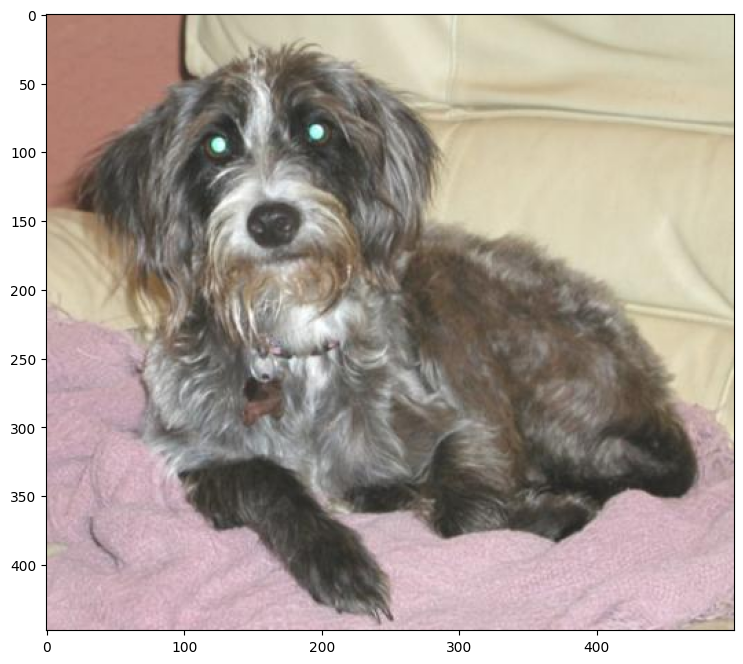

In [ ]:
file = np.random.choice(glob.glob("./PetImages/*/*.jpg"))
plt.imshow(plt.imread(file));

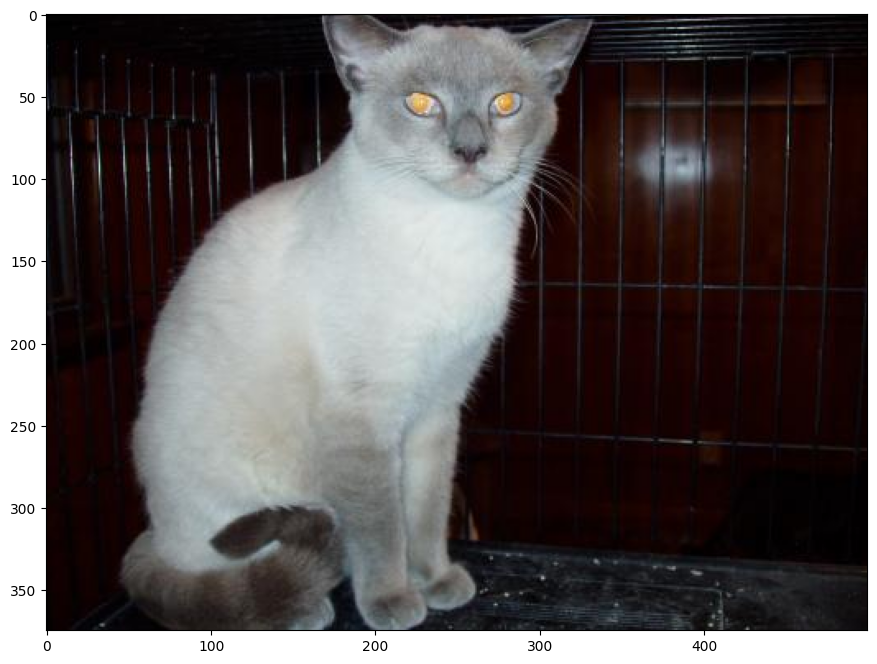

In [ ]:
file = np.random.choice(glob.glob("./PetImages/*/*.jpg"))
plt.imshow(plt.imread(file));

Cats and dogs are of course good, but training a model that will work well on this dataset can be very long...

However, the pictures that we will look at today turn out to be very similar to pictures from the huge ImageNet dataset. The task that we will consider today is called Transfer Learning - in Russian-language literature you can sometimes find the term “learning with knowledge transfer”. We really transfer knowledge - from a network that works well on one dataset (ImageNet) to other data (to the Cats vs Dogs dataset).

### Load the already trained network

The `torchvision` library implements not only a large number of models (all kinds of ResNets, Inception, VGG, AlexNet, DenseNet, ResNext, WideResNet, MobileNet, Visual Transformer etc), but also checkpoints for training these models on ImageNet. However, for the Cats vs Dogs dataset, such a thing is a luxury...

In [ ]:
from torchvision.models import resnet18

model = resnet18(pretrained=True)

for param in model.parameters():
    param.requires_grad = False


In [ ]:
sum([p.numel() for p in model.parameters()])

11689512

In the transfer learning task, we replace the last layer of the neural network with a linear one with two outputs.

In [ ]:
model.fc = nn.Linear(512, 2)

In [ ]:
def train_epoch(
    model,
    data_loader,
    optimizer,
    criterion,
    return_losses=False,
    device="cuda:0",
):
    model = model.to(device).train()
    total_loss = 0
    num_batches = 0
    all_losses = []
    total_predictions = np.array([])#.reshape((0, ))
    total_labels = np.array([])#.reshape((0, ))
    with tqdm(total=len(data_loader), file=sys.stdout) as prbar:
        for images, labels in data_loader:
            # Move Batch to GPU
            images = images.to(device)
            labels = labels.to(device)
            predicted = model(images)
            loss = criterion(predicted, labels)
            # Update weights
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
            # Update descirption for tqdm
            accuracy = (predicted.argmax(1) == labels).float().mean()
            prbar.set_description(
                f"Loss: {round(loss.item(), 4)} "
                f"Accuracy: {round(accuracy.item() * 100, 4)}"
            )
            prbar.update(1)
            total_loss += loss.item()
            total_predictions = np.append(total_predictions, predicted.argmax(1).cpu().detach().numpy())
            total_labels = np.append(total_labels, labels.cpu().detach().numpy())
            num_batches += 1
            
            all_losses.append(loss.detach().item())
    metrics = {"loss": total_loss / num_batches}
    metrics.update({"accuracy": (total_predictions == total_labels).mean()})
    print(f"train_loss: {metrics['loss']}")
    print(f"train_accuracy: {metrics['accuracy']}")
    if return_losses:
        return metrics, all_losses
    else:
        return metrics

@torch.no_grad()
def validate(model, data_loader, criterion, device="cuda:0"):
    model = model.eval()
    total_loss = 0
    num_batches = 0
    total_predictions = np.array([])
    total_labels = np.array([])
    with tqdm(total=len(data_loader), file=sys.stdout) as prbar:
        for images, labels in data_loader:
            images = images.to(device)
            labels = labels.to(device)
            predicted = model(images)
            loss = criterion(predicted, labels)
            accuracy = (predicted.argmax(1) == labels).float().mean()
            prbar.set_description(
                f"Loss: {round(loss.item(), 4)} "
                f"Accuracy: {round(accuracy.item() * 100, 4)}"
            )
            prbar.update(1)
            total_loss += loss.item()
            total_predictions = np.append(total_predictions, predicted.argmax(1).cpu().detach().numpy())
            total_labels = np.append(total_labels, labels.cpu().detach().numpy())
            num_batches += 1
    metrics = {"loss": total_loss / num_batches}
    metrics.update({"accuracy": (total_predictions == total_labels).mean()})
    print(f"val_loss: {metrics['loss']}")
    print(f"val_accuracy: {metrics['accuracy']}")
    return metrics

In [ ]:
def fit(
    model,
    epochs,
    train_data_loader,
    validation_data_loader,
    optimizer,
    criterion,
    device="cuda:0"
):
    all_train_losses = []
    epoch_train_losses = []
    epoch_eval_losses = []
    for epoch in range(epochs):
        # Train step
        print(f"Train Epoch: {epoch}")
        train_metrics, one_epoch_train_losses = train_epoch(
            model=model,
            data_loader=train_data_loader,
            optimizer=optimizer,
            return_losses=True,
            criterion=criterion,
            device=device
        )
        # Save Train losses
        all_train_losses.extend(one_epoch_train_losses)
        epoch_train_losses.append(train_metrics["loss"])
        # Eval step
        print(f"Validation Epoch: {epoch}")
        with torch.no_grad():
            validation_metrics = validate(
                model=model,
                data_loader=validation_data_loader,
                criterion=criterion
            )
        # Save eval losses
        epoch_eval_losses.append(validation_metrics["loss"])

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.fc.parameters(), 1e-4)
device = "cuda:0" if torch.cuda.is_available() else "cpu"

In [ ]:
fit(model, 5, train_dataloader, test_dataloader, optimizer, criterion, device=device)

Train Epoch: 0


  0%|          | 0/79 [00:00<?, ?it/s]

train_loss: 0.6918762688395343
train_accuracy: 0.5601560156015601
Validation Epoch: 0


  0%|          | 0/20 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/PIL/TiffImagePlugin.py:858: UserWarning: Truncated File Read
  warnings.warn(str(msg))


val_loss: 0.4801797211170197
val_accuracy: 0.8208
Train Epoch: 1


  0%|          | 0/79 [00:00<?, ?it/s]

train_loss: 0.38689088481891004
train_accuracy: 0.8837383738373837
Validation Epoch: 1


  0%|          | 0/20 [00:00<?, ?it/s]

val_loss: 0.3055955708026886
val_accuracy: 0.9214
Train Epoch: 2


  0%|          | 0/79 [00:00<?, ?it/s]

train_loss: 0.26847001929071884
train_accuracy: 0.935093509350935
Validation Epoch: 2


  0%|          | 0/20 [00:00<?, ?it/s]

val_loss: 0.22859987691044809
val_accuracy: 0.9448
Train Epoch: 3


  0%|          | 0/79 [00:00<?, ?it/s]

train_loss: 0.21068367720404757
train_accuracy: 0.9505950595059506
Validation Epoch: 3


  0%|          | 0/20 [00:00<?, ?it/s]

val_loss: 0.18519266694784164
val_accuracy: 0.9566
Train Epoch: 4


  0%|          | 0/79 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [ ]:
for p in model.layer4.parameters():
    p.requires_grad = True

As you can see, one training epoch takes about two minutes, and after just one epoch, acceptable quality is achieved. Let's initialize the model from scratch and try to train it.

In [ ]:
model_full = resnet18(pretrained=False)
model_full.fc = nn.Linear(512, 2)
optimizer = torch.optim.Adam(model.parameters(), 1e-4)  # YOUR CODE. It must optimize across all parameters

In [ ]:
fit(model_full, 5, train_dataloader, test_dataloader, optimizer, criterion, device=device)


As we can see, the neural network converges very quickly on transfer learning. Significantly faster than initialized from scratch. It's safe to say that transfer learning is a very useful technique.

# 4. Adversarial Atack

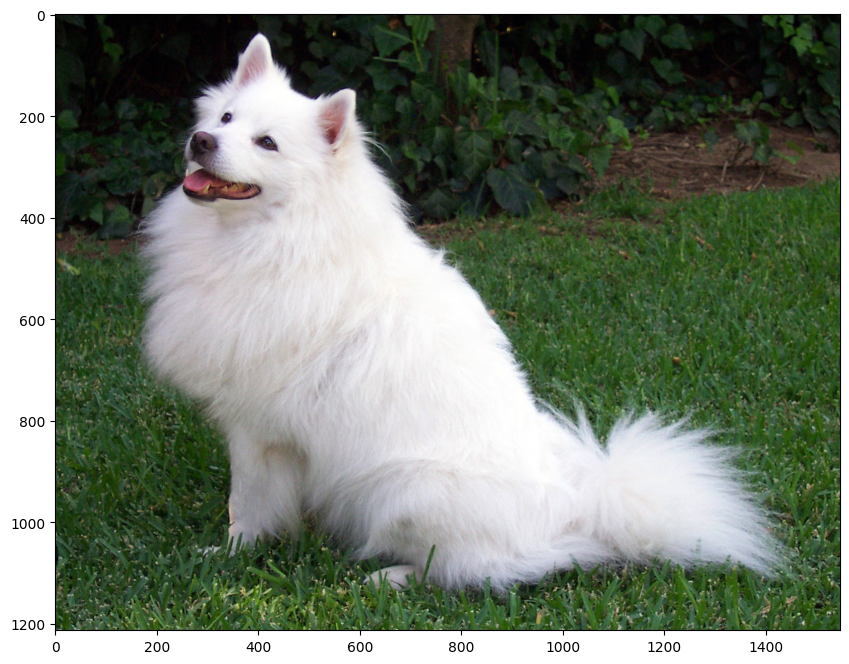

In [ ]:
import urllib
from PIL import Image
import torchvision.transforms as transforms


url, filename = ("https://github.com/pytorch/hub/raw/master/images/dog.jpg", "dog.jpg")
try:
    urllib.URLopener().retrieve(url, filename)
except:
    urllib.request.urlretrieve(url, filename)

input_image = Image.open(filename)
preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])
inv_preprocess = transforms.Compose([transforms.Normalize(mean=[0., 0., 0.],
                                                          std=[1/0.229, 1/0.224, 1/0.225]),
                                     transforms.Normalize(mean=[-0.485, -0.456, -0.406],
                                                          std=[1., 1., 1.]),])
input_tensor = preprocess(input_image)
input_batch = input_tensor.unsqueeze(0)


plt.imshow(input_image)

## [Fast Gradient Sign Method (FGSM)](https://arxiv.org/pdf/1412.6572.pdf)

The Fast Gradient Sign Method (FGSM) is a technique used to generate adversarial examples, which are inputs designed to cause a machine learning model to make a mistake. The method is relatively simple and fast, making it one of the most popular approaches for evaluating the robustness of models against adversarial attacks.

## Overview

FGSM works by exploiting the gradients of the neural network to create an adversarial example. For an input image `x` and its corresponding label `y`, FGSM generates an adversarial image `x'` by adding a small perturbation in the direction of the gradient of the loss with respect to the input image. This perturbation is intended to increase the loss, leading the model to misclassify the perturbed input.

## Formula

The adversarial example `x'` is generated using the formula:

$$x' = x + \varepsilon * sign(\nabla_x L(\theta, x, y))$$


where:
- $x$: Original input image.
- $\varepsilon$: A small scalar value that determines the magnitude of the perturbation.
- $sign(\nabla_x L(\theta, x, y))$: Sign of the gradient of the loss `L` with respect to the input image `x`, model parameters `θ`, and true label `y`.

The $\varepsilon$ value is crucial: it must be large enough to cause the model to misclassify the perturbed input but small enough to keep the perturbation imperceptible to humans.

<img src="https://pytorch.org/tutorials/_images/fgsm_panda_image.png">

## Significance

FGSM is significant for several reasons:
- **Efficiency**: It requires only one step to generate an adversarial example, making it much faster than iterative methods.
- **Simplicity**: The method is straightforward to implement and understand, serving as a foundation for more complex adversarial attack techniques.
- **Robustness Evaluation**: FGSM is widely used to test the robustness of neural networks, helping developers understand and improve the security of their models against adversarial threats.

Despite its simplicity, FGSM has been remarkably effective in highlighting the vulnerability of deep learning models to adversarial examples, spurring ongoing research into more robust architectures and training methods.


In [ ]:
!wget https://raw.githubusercontent.com/pytorch/hub/master/imagenet_classes.txt

--2024-03-30 23:15:31--  https://raw.githubusercontent.com/pytorch/hub/master/imagenet_classes.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10472 (10K) [text/plain]
Saving to: ‘imagenet_classes.txt’

imagenet_classes.tx 100%[===================>]  10.23K  --.-KB/s    in 0s      

2024-03-30 23:15:31 (40.5 MB/s) - ‘imagenet_classes.txt’ saved [10472/10472]



In [ ]:
with open("imagenet_classes.txt", "r") as f:
    categories = [s.strip() for s in f.readlines()]

In [ ]:
model = resnet18(pretrained=True)

model.eval()
with torch.no_grad():
    output = model(input_batch)
probs = F.softmax(output[0], dim=-1)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [ ]:
prob, index = torch.max(probs, dim=0)
print(f"It's {categories[index]} with probability of {prob}")

It's Samoyed with probability of 0.8846223950386047


In [ ]:
def fgsm_attack(
    original_image: torch.Tensor, epsilon: float, data_grad: torch.Tensor
) -> torch.Tensor:
    perturbated_image = original_image + epsilon * torch.sign(data_grad)
    return perturbated_image

model.eval()

input_batch.requires_grad = True
epsilon = 0.1
output = model(input_batch)

loss = F.cross_entropy(input=output,
                       target=torch.tensor([index]))
model.zero_grad()
loss.backward()
data_grad = input_batch.grad.data
perturbed_image = fgsm_attack(input_batch, epsilon, data_grad)

new_probs = F.softmax(model(perturbed_image)[0], dim=-1)
prob, index = torch.max(new_probs, dim=0)
print(f"It's {categories[index]} with probability of {prob}")

It's Arctic fox with probability of 0.3595571517944336


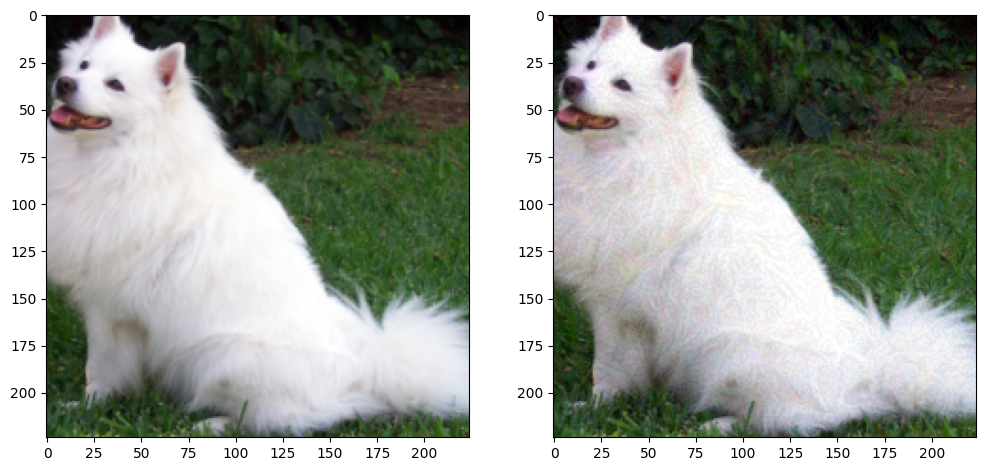

In [ ]:
fig, axes = plt.subplots(1, 2)
axes[0].imshow(inv_preprocess(input_tensor).numpy().transpose((1, 2, 0)))
axes[1].imshow(inv_preprocess(perturbed_image.detach().squeeze()).numpy().transpose((1, 2, 0)))